In [1]:
from sklearn import model_selection
from keras import Sequential
from keras import datasets
from keras.layers import *
from keras.models import *
from keras.optimizers import Adam
from keras import losses
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

folder = "/home/strahinja/Desktop/valjda_kraj/new_kraj/dataset_filtered/"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

files = []
y = []
i=0
for _file in onlyfiles:
    files.append(_file)
    label_in_file = _file.rfind("_")
    label_in_file = label_in_file + 1
    y.append(int(_file[label_in_file:label_in_file + 1]))

image_size = 30

x = np.ndarray(shape=(len(files), image_size, image_size),
                     dtype=int)

i = 0
for _file in files:
    img = load_img(folder + "/" + _file)
    img.thumbnail((image_size, image_size))
    img = img_to_array(img)
    img = img.reshape(image_size, image_size, 3)
    img = np.mean(img, axis = 2)
    x[i] = img
    i += 1
    
print(type(x))

<class 'numpy.ndarray'>


In [3]:
# np.save('dataset_x', x)
# np.save('dataset_y', y)

In [4]:
# x = np.load('new_dataset_x.npy')
# y = np.load('new_dataset_y.npy')

9


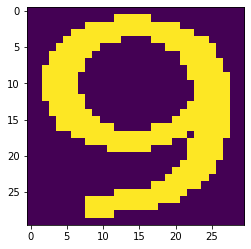

In [5]:
plt.imshow(x[26])
print(y[26])

In [6]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 7, stratify = y)

In [7]:
image_size = 30
network = Sequential()
network.add(Conv2D(input_shape=(image_size, image_size, 1), filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
network.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
network.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
network.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
network.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
network.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
network.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
network.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
network.add(Flatten())
network.add(Dense(units=32, activation='relu'))
network.add(Dense(units=10, activation='softmax'))

In [8]:
network.compile(optimizer='adam', loss = losses.categorical_crossentropy, metrics=['acc'])

In [9]:
x_train[0].shape

(30, 30)

In [10]:
x_train = x_train / 255
x_test = x_test / 255

x_train.shape

(12180, 30, 30)

In [11]:
x_train = x_train.reshape(x_train.shape[0], x_train[0].shape[0], x_train[0].shape[0], 1)
x_test = x_test.reshape(x_test.shape[0], x_test[0].shape[0], x_test[0].shape[0], 1)
x_train.shape

(12180, 30, 30, 1)

In [12]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [13]:
filepath = './checkpoints/chekpoint' + "-final-{epoch:02d}-{val_acc:.2f}.hdf5"
callbacks = [
    EarlyStopping(monitor='acc', min_delta=0, patience=3, mode='auto'),
    ModelCheckpoint(filepath=filepath, verbose=1, save_best_only=True)
]

In [14]:
history = network.fit(x_train, y_train, batch_size=64, epochs=30, verbose=1, callbacks=callbacks, validation_split=0.3)

Train on 8526 samples, validate on 3654 samples
Epoch 1/30
8526/8526 [==============================] - 19s 2ms/step - loss: 0.1059 - acc: 0.9710 - val_loss: 2.2621e-06 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.00000, saving model to ./checkpoints/chekpoint-final-01-1.00.hdf5
Epoch 2/30
8526/8526 [==============================] - 19s 2ms/step - loss: 1.7132e-06 - acc: 1.0000 - val_loss: 9.9665e-07 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.00000 to 0.00000, saving model to ./checkpoints/chekpoint-final-02-1.00.hdf5
Epoch 3/30
8526/8526 [==============================] - 19s 2ms/step - loss: 9.0863e-07 - acc: 1.0000 - val_loss: 6.5168e-07 - val_acc: 1.0000

Epoch 00003: val_loss improved from 0.00000 to 0.00000, saving model to ./checkpoints/chekpoint-final-03-1.00.hdf5
Epoch 4/30
8526/8526 [==============================] - 19s 2ms/step - loss: 6.1541e-07 - acc: 1.0000 - val_loss: 4.7565e-07 - val_acc: 1.0000

Epoch 00004: val_loss improved from 0.0

In [15]:
network.evaluate(x_test, y_test)

6000/6000 [==============================] - 4s 623us/step


[4.006674403171928e-07, 1.0]

In [16]:
# x = x / 255

In [17]:
# x = x.reshape(x.shape[0], x[0].shape[0], x[0].shape[0], 1)
# y = to_categorical(y, num_classes=10)

In [18]:
# history = network.fit(x, y, batch_size=64, epochs=10, verbose=1)

In [19]:
network.save('/home/strahinja/Desktop/valjda_kraj/new_kraj/neural_filtered.hdf5')